# **Convolutional Neural Networks**
## *Imagine Recognition*

Una delle applicazioni più diffuse del **deep learning** riguarda il *riconoscimento degli oggetti* presenti all'interno di un'immagine. In tal senso, è necessario introdurre due ulteriori layer, che rappresentano la base per le cosiddette **convolutional neural network**.

Queste reti (che chiameremo per brevità **CNN**) sono specializzate nel lavorare su immagini, ma possono anche essere usate per segnali monodimensionali (come la voce) o tridimensionali (come le nuvole di punti).

Le CNN assumono una rilevanza fondamentale nel moderno deep learning: è grazie a loro se il campo del deep learning è diventato mainstream nel mondo della ricerca, il che ha portato ad un interesse e, conseguentemente, ad avanzamenti impensabili in un ridottissimo lasso di tempo di soli dieci anni. Oggigiorno, le CNN vengono utilizzate in ogni ambito che preveda l'*elaborazione di dati bidimensionali*, dal *riconoscimento facciale* all'*individuazione* e caratterizzazione delle targhe degli autoveicoli in transito; conoscerle, quindi, è imprescindibile.

## **Layer Convoluzionale**

I **layers convoluzionali** sono alla base del funzionamento delle CNN.

Il concetto alla base di questo tipo di layer è la **convoluzione** che, nel contesto del deep learning, è un'*operazione lineare che prevede la moltiplicazione di un insieme di pesi*, chiamato **filtro**, con una piccola porzione (o *finestra*) dell'immagine considerata, seguita ovviamente da una funzione di attivazione. Questo processo è analogo a quello che avviene in una tradizionale rete neurale.

Il filtro ha dimensioni volutamente *inferiori* rispetto a quelle dell'immagine da *convolver*e, tipicamente nell'ordine di $3x3$ o $5x$ pixel; la convoluzione del filtro per ogni finestra dell'immagine è inoltre assimilabile ad un *prodotto scalare*, per cui viene restituito sempre un unico valore per ogni finestra convoluta. In tal senso, il filtro viene "fatto scorrere" *dall'alto in basso*, *da sinistra verso destra*, anche su finestre sovrapposte, che scorrono quindi a passo di un pixel.

*Tecnicamente, quindi, l'operazione definita come "convoluzione" è in realtà una cross-correlazione.*

Applicare sistematicamente lo *stesso filtro* su tutte le finestre possibili dell'immagine, anche sovrapposte, è un'idea alquanto potente: infatti, un filtro viene opportunamente *tarato* per riconoscere uno specifico tipo di feature, come un *bordo* o una *forma*, che potrà essere trovata ovunque nell'immagine grazie allo scorrimento, ottenendo la cosiddetta **invarianza alla traslazione**.

Abbiamo accennato al fatto che l'output dell'applicazione di un filtro su di una finestra dell'immagine è un prodotto scalare. Di conseguenza, man mano cheil filtro scorre, viene creato un *array bidimensionale* di valori, che viene indicato come **mappa delle feature**, o **feature map**. Sarà proprio questa, e non l'immagine iniziale, ad essere passata al layer successivo.

## **Layer di Pooling**

Abbiamo visto come i layer convoluzionali creino delle *feature map* che "sintetizzano" la presenza di determinate feature all'interno di un input. Un limite di queste mappature sta però nel fatto che registrano la posizione precisa della feature individuata all'interno dell'input: ciò significa quindi che anche *piccole variazioni nella posizione di una feature risulterà in una feature map completamente differente*, il che comporta un'estrema sensibilità della rete neurale a piccole trasformazioni dell'immagine di input.

Per risolvere questo problema, si utilizza un approccio chiamato **sottocampionamento**: in pratica, si ricava una versione a *più bassa risoluzione del segnale di ingresso*, evidenziando di conseguenza gli elementi più importanti, e scartando i piccoli dettagli non rilevanti nel task di classificazione. Per far questo, viene utilizzato un **layer di pooling**, applicato *a cascata rispetto a quello convoluzionale*.

Il *layer di pooling* non fa altro che applicare un filtro, di solito di dimensioni $2x2$ e con un passo di $2$ pixel (quindi senza sovrapposizioni), che applica una funzione di sottocampionamento, scegliendo quindi un unico pixel tra quelli presenti nel filtro. Due *funzioni di pooling* molto comuni sono le seguenti:

- **average pooling**: questo filtro associa ad ogni finestra dell'immagine in input il valore medio presente nella finestra;

- **max pooling**: questo filtro associa ad ogni finestra dell'immagine in input il valore massimo presente nella finestra.

Ottenendo quindi una versione "sottocampionata" dell'input, si raggiunge la cosiddetta **invarianza a traslazioni locali**, ovvero una sorta di "insensibilità" del modello a traslazioni o rotazioni di entità minima.

## **Esercizi**

In [1]:
import matplotlib.pyplot as plt

from tensorflow import keras

### **Es 11.0**

Creare un modello di rete neurale composto in questo modo:

Layer (type) | Output Shape | Param # 
:-----: | :--------: | :-----:
**conv_1 (Conv2D)**   |  (None, 30, 30, 32)  | 896
**pooling_1 (MaxPooling2D)**  | (None, 15, 15, 32)  | 0
**conv_2 (Conv2D)**  | (None, 13, 13, 32)  | 9248
**dropout (Dropout)**   |  (None, 13, 13, 32)   | 0
**flatten (Flatten)**  |  (None, 5408)   | 0
**classification (Dense)**  | (None, 10)  | 54090

Questo modello deve essere in grado di classificare le immagini presenti nel dataset [CIFAR10](https://keras.io/api/datasets/cifar10/).

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
model = keras.Sequential(
    [
        keras.Input(
            shape=(32, 32, 3),
            name='input'),
        keras.layers.Conv2D(
            32,
            (3, 3),
            activation='relu',
            name='conv_1'),
        keras.layers.MaxPool2D(
            pool_size=(2, 2),
            name='pooling_1'),
        keras.layers.Conv2D(
            32,
            (3, 3),
            activation='relu',
            name='conv_2'),
        keras.layers.Dropout(
            0.5,
            name='dropout'),
        keras.layers.Flatten(name='flatten'),
        keras.layers.Dense(
            10,
            activation='softmax',
            name='classification')
    ]
)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['acc'])

history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=25,
    validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 17s 60ms/step - loss: 3.6225 - acc: 0.1083 - val_loss: 2.3017 - val_acc: 0.1013
Epoch 2/25
274/274 [==============================] - 15s 56ms/step - loss: 2.2880 - acc: 0.1215 - val_loss: 2.2501 - val_acc: 0.1730
Epoch 3/25
274/274 [==============================] - 15s 56ms/step - loss: 2.2677 - acc: 0.1370 - val_loss: 2.2882 - val_acc: 0.1970
Epoch 4/25
274/274 [==============================] - 17s 61ms/step - loss: 2.2498 - acc: 0.1445 - val_loss: 2.0940 - val_acc: 0.2268
Epoch 5/25
274/274 [==============================] - 17s 61ms/step - loss: 2.2575 - acc: 0.1367 - val_loss: 2.1400 - val_acc: 0.2116
Epoch 6/25
274/274 [==============================] - 18s 64ms/step - loss: 2.1017 - acc: 0.2196 - val_loss: 2.0496 - val_acc: 0.2377
Epoch 7/25
274/274 [==============================] - 19s 68ms/step - loss: 2.0624 - acc: 0.2255 - val_loss: 1.9971 - val_acc: 0.2541
Epoch 8/25
274/274 [==============================] - 17s 62ms

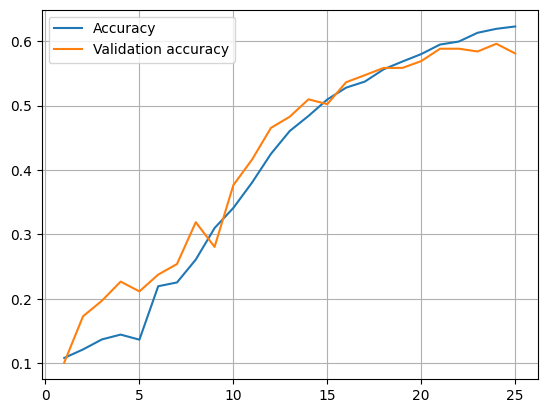

In [4]:
plt.plot(
    range(1, 26),
    history.history['acc'],
    label='Accuracy')
plt.plot(
    range(1, 26),
    history.history['val_acc'],
    label='Validation accuracy')
plt.legend()
plt.grid()
plt.show()

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 15, 15, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 13, 13, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 classification (Dense)      (None, 10)                54090     
                                                                 
Total params: 64,234
Trainable params: 64,234
Non-traina